# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')

In [26]:
df.drop('mau', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


### Selecionando só as variáveis quantitativas

In [69]:
df_num = df.select_dtypes(exclude=['object', 'bool'])
x= df_num.corr()

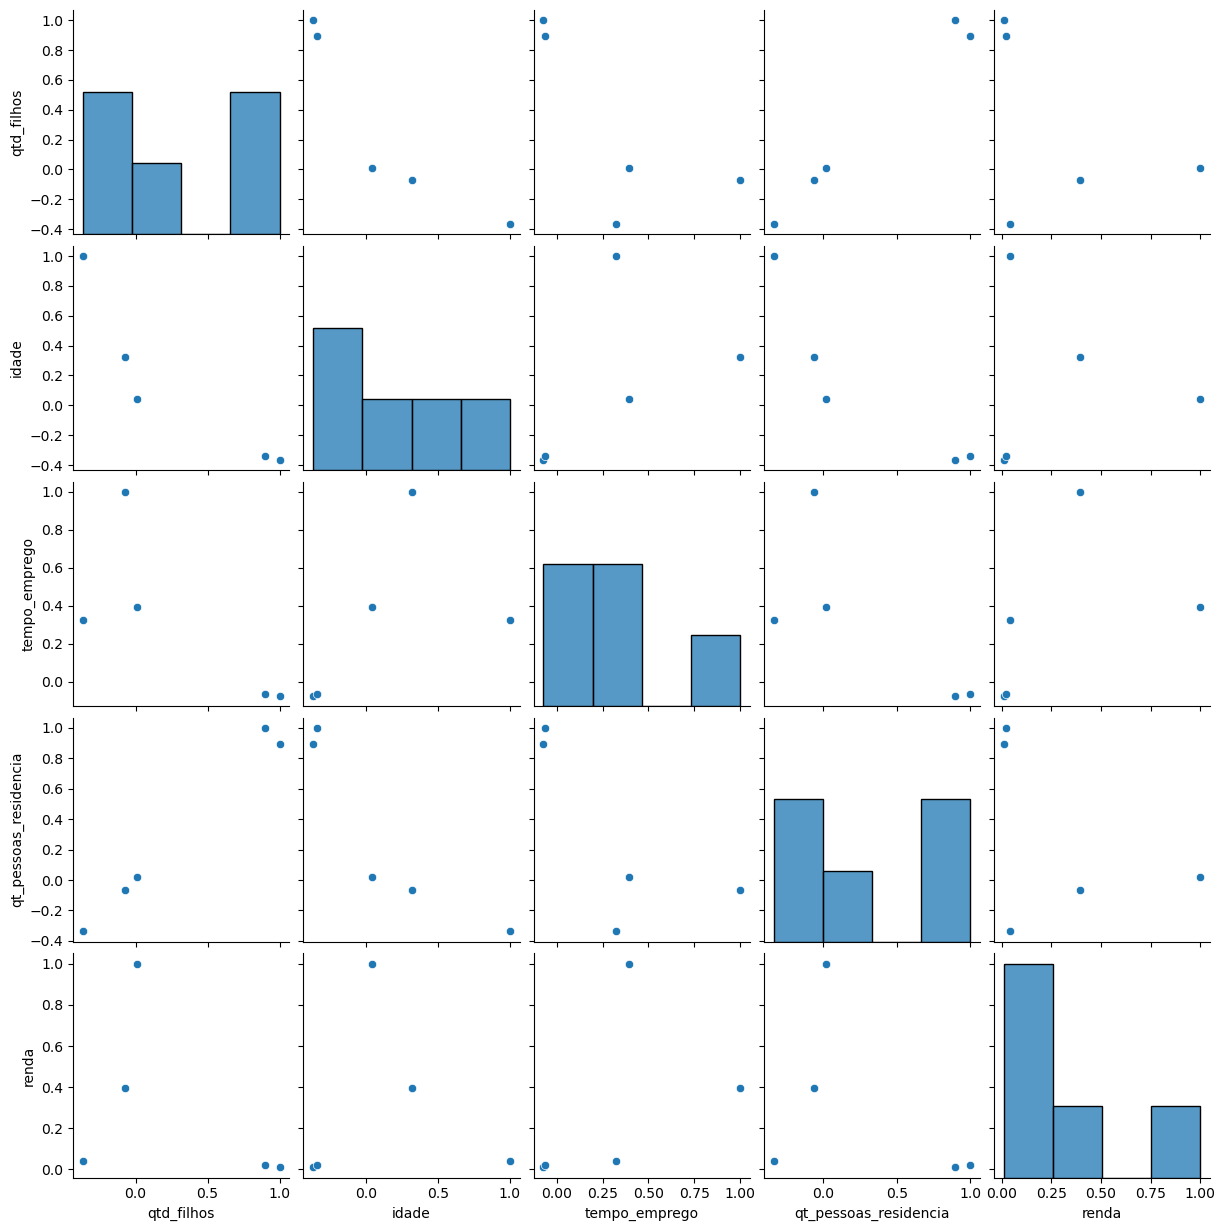

In [58]:
df_num = sns.pairplot(df_num)

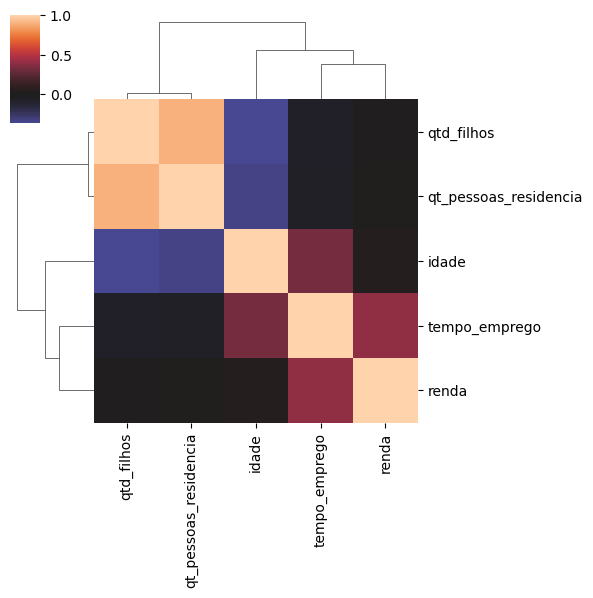

In [65]:
sns.clustermap((x), figsize=(6, 6), center=0)

## um comentário: Talvez se transformar alguma variável qualitativa para quantitativa, por exemplo a educação e tipo de renda,  o resultado de correlação entre a rende aumente com a idade e tempo de emprego

In [71]:
display(x)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


In [130]:
df_ren = df[['renda', 'idade', 'tempo_emprego', 'educacao']]

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

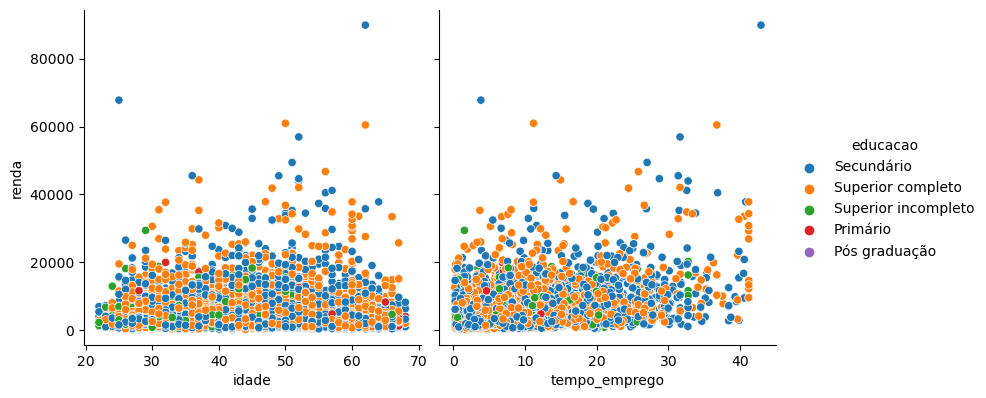

In [98]:
#sns.relplot(df_ren)
sns.pairplot(df_ren, hue='educacao', y_vars=['renda'], x_vars=['idade', 'tempo_emprego'], height=4)
plt.show()

3) Na su aopinião, há outliers na variável renda?

#### Sim

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [131]:
df_ren['renda'] = np.log(df_ren['renda'])

C:\Users\joass\AppData\Local\Temp\ipykernel_13852\785857245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ren['renda'] = np.log(df_ren['renda'])


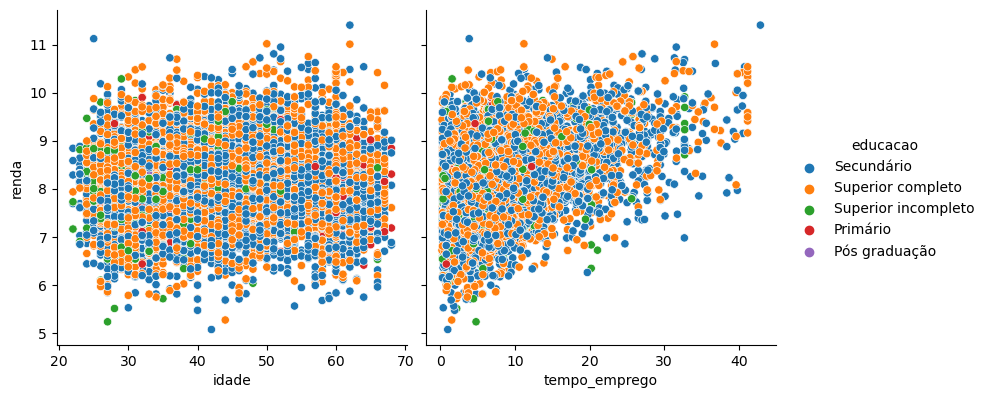

In [132]:
sns.pairplot(df_ren, hue='educacao', y_vars=['renda'], x_vars=['idade', 'tempo_emprego'], height=4)
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### Melhorou